In [428]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

#Importar base de datos
df = pd.read_csv("base_de_datos_precio_viviendas.csv", delimiter=";")
print (df.head())

   MSSubClass MSZoning  LotArea LotConfig Neighborhood  YearBuilt  \
0          60       RL     8450    Inside      CollgCr       2003   
1          20       RL     9600       FR2      Veenker       1976   
2          60       RL    11250    Inside      CollgCr       2001   
3          70       RL     9550    Corner      Crawfor       1915   
4          60       RL    14260       FR2      NoRidge       2000   

   TotalBsmtSF  GrLivArea  FullBath  KitchenAbvGr  TotRmsAbvGrd  GarageArea  \
0          856       1710         2             1             8         548   
1         1262       1262         2             1             6         460   
2          920       1786         2             1             6         608   
3          756       1717         1             1             7         642   
4         1145       2198         2             1             9         836   

   YrSold  SalePrice  
0    2008     208500  
1    2007     181500  
2    2008     223500  
3    2006     1400

      Descripción de la base de datos

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   LotConfig     1460 non-null   object
 4   Neighborhood  1460 non-null   object
 5   YearBuilt     1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   GrLivArea     1460 non-null   int64 
 8   FullBath      1460 non-null   int64 
 9   KitchenAbvGr  1460 non-null   int64 
 10  TotRmsAbvGrd  1460 non-null   int64 
 11  GarageArea    1460 non-null   int64 
 12  YrSold        1460 non-null   int64 
 13  SalePrice     1460 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 159.8+ KB


La base de datos no presenta datos faltantes y esta compuesta por 3 variables categóricas, 10 numéricas y 1 variables cuantificada que es MSSubClass.

In [430]:
df.shape


(1460, 14)

In [431]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
Neighborhood    0
YearBuilt       0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
KitchenAbvGr    0
TotRmsAbvGrd    0
GarageArea      0
YrSold          0
SalePrice       0
dtype: int64

In [432]:
df.nunique()

MSSubClass        15
MSZoning           5
LotArea         1073
LotConfig          5
Neighborhood      25
YearBuilt        112
TotalBsmtSF      721
GrLivArea        861
FullBath           4
KitchenAbvGr       4
TotRmsAbvGrd      12
GarageArea       441
YrSold             5
SalePrice        663
dtype: int64

                                 Visualización de las variables
                                           categóricas

<Axes: xlabel='MSSubClass', ylabel='count'>

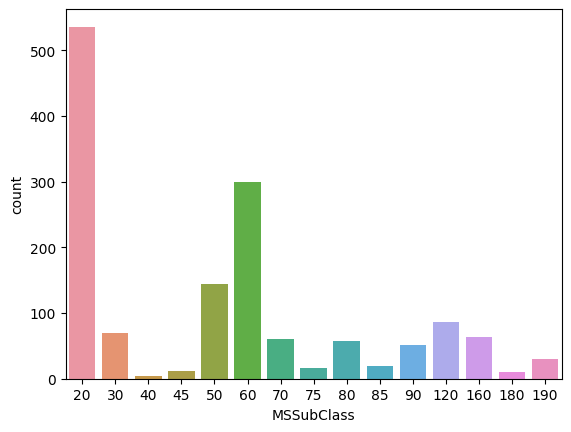

In [433]:
sns.countplot(x="MSSubClass",data=df)

Podemos evidenciar que la variable que más se repite cuando se quiere explicar el tipo de construcción de la vivienda (MSSubClass) es "1-STORY 1946 & NEWER ALL STYLES" (20), y la segunda es "2-STORY 1946 & NEWER" (60).

<Axes: xlabel='MSZoning', ylabel='count'>

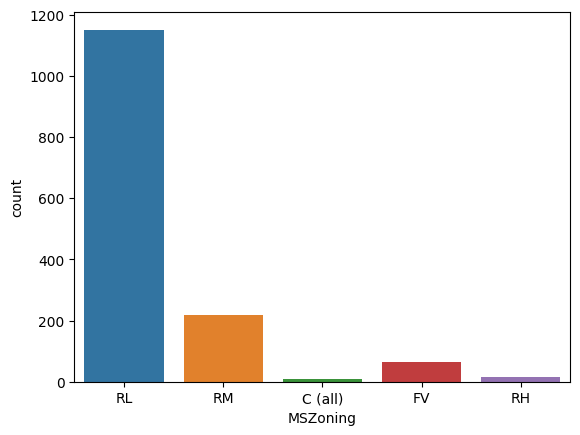

In [434]:
sns.countplot(x="MSZoning",data=df)

Podemos evidenciar que la variable que más se repite cuando se quiere explicar la clasificación general de zonificación (MSZoning) es "Zona reciencial de baja densidad" (RL), y la que menos se repite es "Zona comercial" (C).

<Axes: xlabel='LotConfig', ylabel='count'>

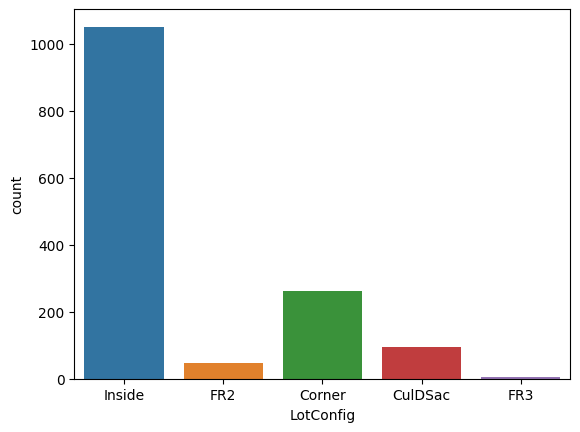

In [435]:
sns.countplot(x="LotConfig",data=df)

Podemos evidenciar que la variable que más se repite cuando se quiere explicar la configuración del lote es "Lote interior" (Inside), y la que menos se repite con muy pocos valores es "en frente a 3 sides de la propiedad" (FR3).

<Axes: xlabel='Neighborhood', ylabel='count'>

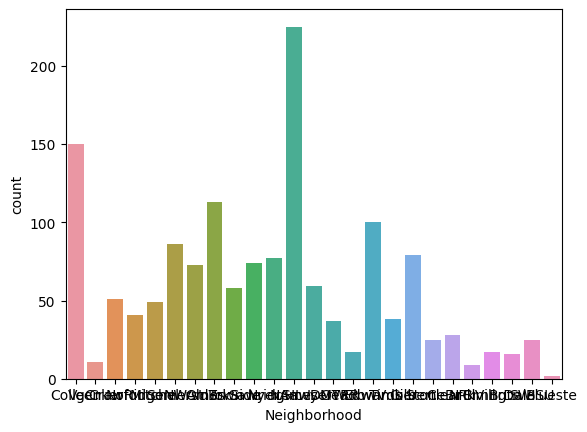

In [436]:
sns.countplot(x="Neighborhood",data=df)

In [437]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

Podemos evidenciar que la variable que más se repite cuando se quiere explicar las ubicaciones físicas dentro de los límites de la ciudad es "Norte de AMES" (NAmes), y la que menos se repite con muy pocos valores (2) es "Bluestem" (Blueste).

                                   Visualización de las variables
                                           numéricas

<Axes: ylabel='LotArea'>

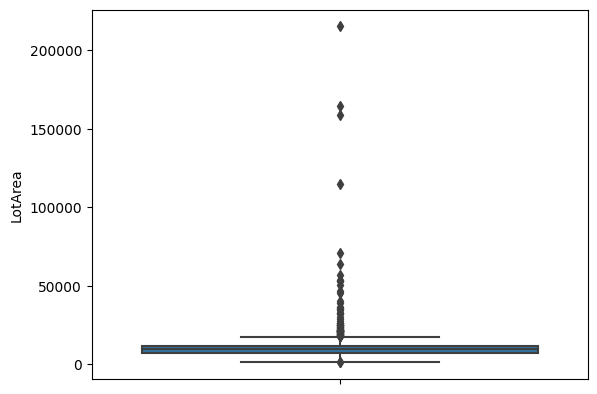

In [438]:
sns.boxplot(y="LotArea",data=df)

<Axes: ylabel='YearBuilt'>

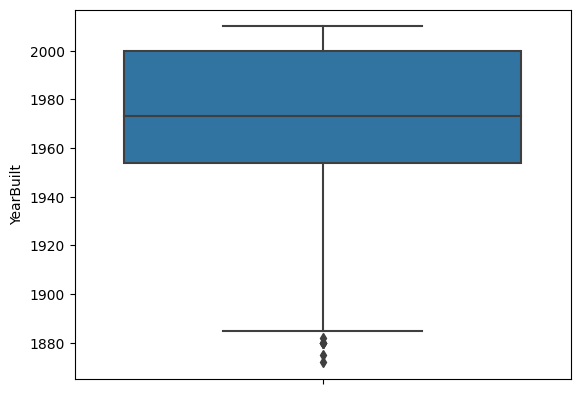

In [439]:
sns.boxplot(y="YearBuilt",data=df)

<Axes: ylabel='TotalBsmtSF'>

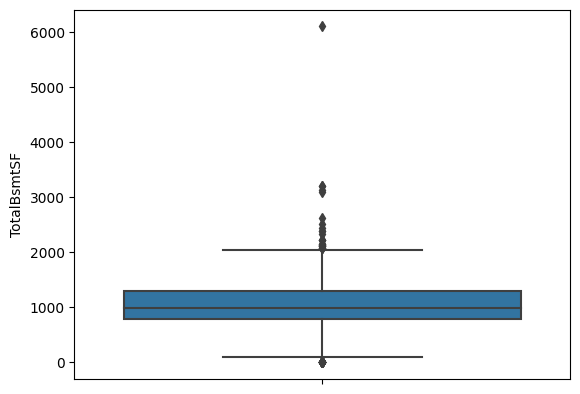

In [440]:
sns.boxplot(y="TotalBsmtSF",data=df)

<Axes: ylabel='GrLivArea'>

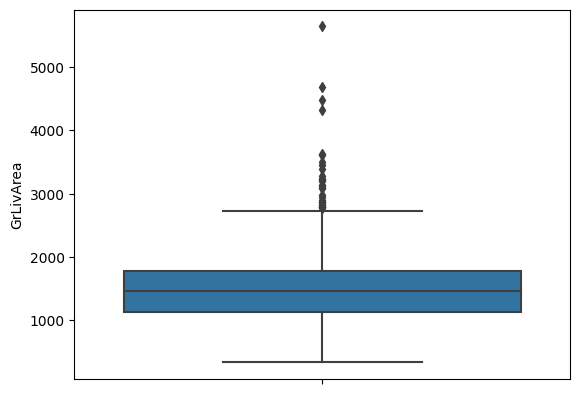

In [441]:
sns.boxplot(y="GrLivArea",data=df)

<Axes: ylabel='FullBath'>

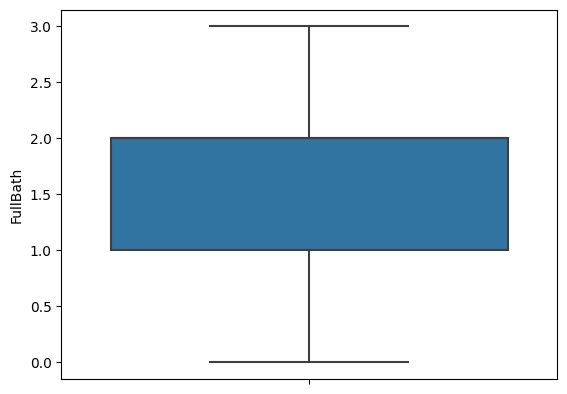

In [442]:
sns.boxplot(y="FullBath",data=df)

<Axes: ylabel='KitchenAbvGr'>

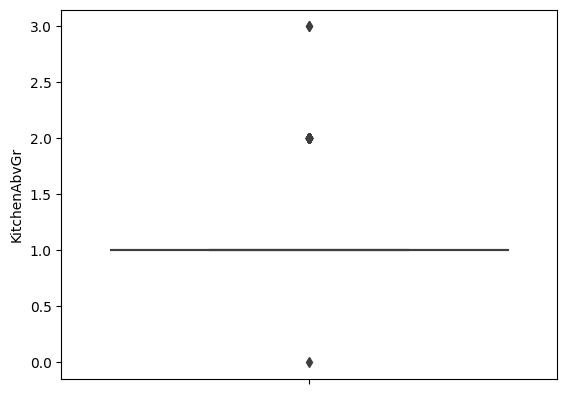

In [443]:
sns.boxplot(y="KitchenAbvGr",data=df)

In [444]:
df["KitchenAbvGr"].value_counts()

KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64

<Axes: ylabel='TotRmsAbvGrd'>

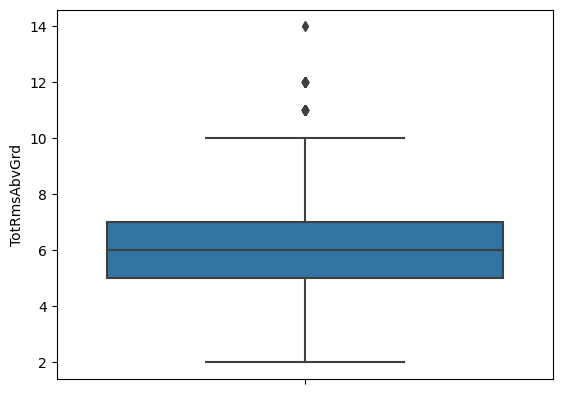

In [445]:
sns.boxplot(y="TotRmsAbvGrd",data=df)

<Axes: ylabel='GarageArea'>

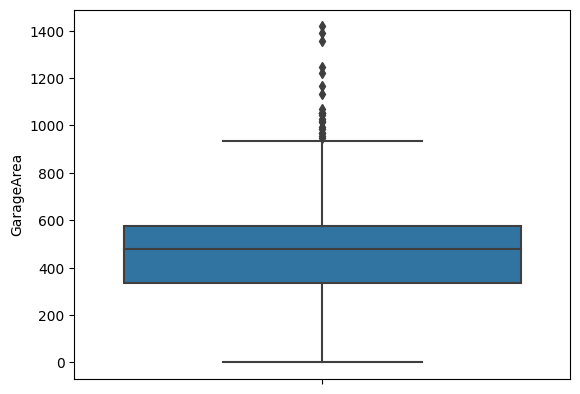

In [446]:
sns.boxplot(y="GarageArea",data=df)

<Axes: ylabel='YrSold'>

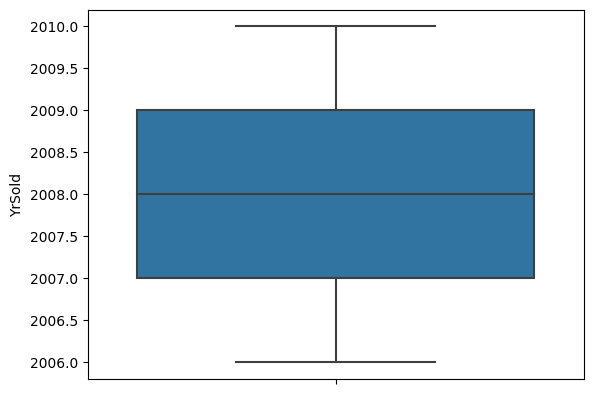

In [447]:
sns.boxplot(y="YrSold",data=df)

<Axes: ylabel='SalePrice'>

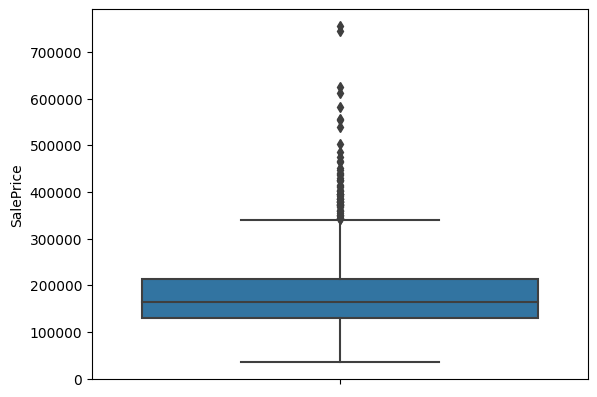

In [448]:
sns.boxplot(y="SalePrice",data=df)

Podemos lograr ver que en su mayoría los boxplot no presentan datos que puedan alterar el modelo a exepción de la variable "LotArea".

                                    Correlaciones

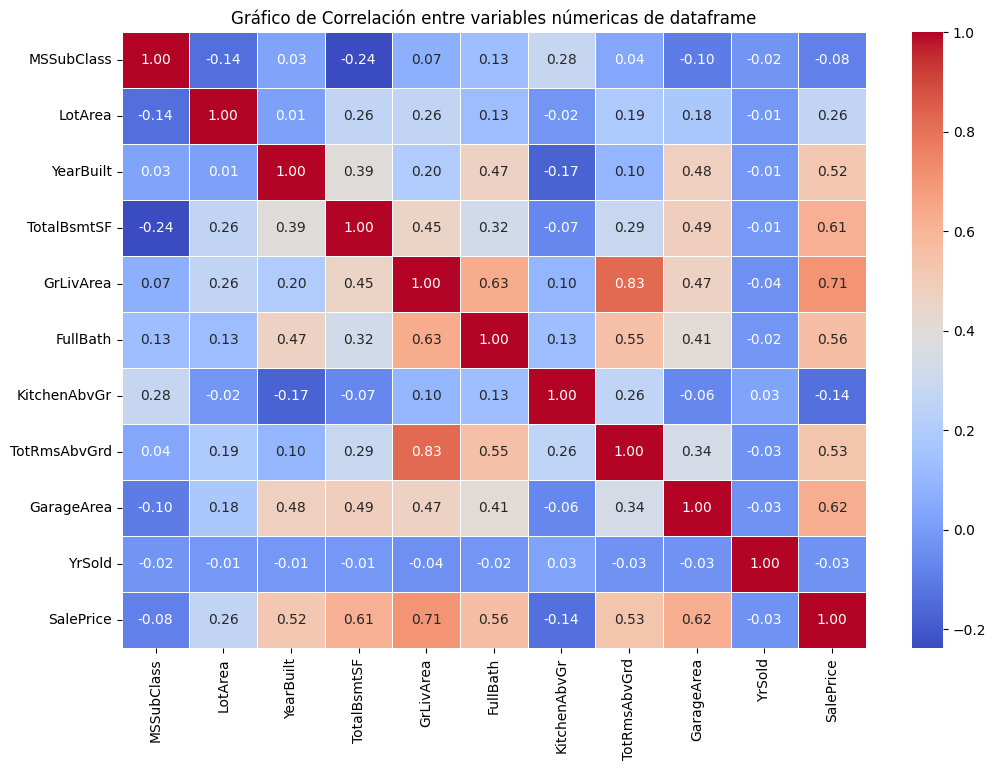

In [449]:
variables_numericas= ["MSSubClass","LotArea","YearBuilt",
              "TotalBsmtSF","GrLivArea","FullBath","KitchenAbvGr","TotRmsAbvGrd",
              "GarageArea","YrSold","SalePrice"]

matriz_correlacion=df[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación entre variables númericas de dataframe")
plt.show()

                         Tratamiento de Outliers

In [450]:
#Espacio para Felipe

                            Creación de variables Dummies

In [451]:
df= pd.get_dummies(df,drop_first=True)
df.head()



,MSSubClass,LotArea,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,KitchenAbvGr,TotRmsAbvGrd,GarageArea,YrSold,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,8450,2003,856,1710,2,1,8,548,2008,...,False,False,False,False,False,False,False,False,False,False
1,20,9600,1976,1262,1262,2,1,6,460,2007,...,False,False,False,False,False,False,False,False,False,True
2,60,11250,2001,920,1786,2,1,6,608,2008,...,False,False,False,False,False,False,False,False,False,False
3,70,9550,1915,756,1717,1,1,7,642,2006,...,False,False,False,False,False,False,False,False,False,False
4,60,14260,2000,1145,2198,2,1,9,836,2008,...,True,False,False,False,False,False,False,False,False,False


                             Regresión Lineal Multiple

In [452]:
df["SalePrice"] = df["SalePrice"].astype(float)

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   LotArea               1460 non-null   int64  
 2   YearBuilt             1460 non-null   int64  
 3   TotalBsmtSF           1460 non-null   int64  
 4   GrLivArea             1460 non-null   int64  
 5   FullBath              1460 non-null   int64  
 6   KitchenAbvGr          1460 non-null   int64  
 7   TotRmsAbvGrd          1460 non-null   int64  
 8   GarageArea            1460 non-null   int64  
 9   YrSold                1460 non-null   int64  
 10  SalePrice             1460 non-null   float64
 11  MSZoning_FV           1460 non-null   bool   
 12  MSZoning_RH           1460 non-null   bool   
 13  MSZoning_RL           1460 non-null   bool   
 14  MSZoning_RM           1460 non-null   bool   
 15  LotConfig_CulDSac    

In [454]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sn
X_multi=df.drop("SalePrice",axis=1)
X_multi.head()
y_multi = df["SalePrice"].astype(float)
X_multi_cons=sn.add_constant(X_multi)

In [455]:
lm_multi=sn.OLS(y_multi, X_multi_cons).fit()
lm_multi.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).